# Heart Disease Prediction on UCI Dataset

## I. Processing the Dataset

In [1]:
import pandas as pd

The dataset identifies 14 patient features or symptoms. 
- `age`: patient age
- `sex`: patient sex (0: female, 1: male)
- `cp`: chest pain type (1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic)
- `trestbps`: resting blood pressure
- `chol`: cholesterol
- `fbs`: fasting blood sugar <120 (0: true, 1: false)
- `restecg`: resting electrocardiographic results (0: normal, 1: abnormal, 2: definite left ventricular hypertrophy)
- `thalach`: maximum heart rate achieved
- `exang`: exercise induced angina (1: yes, 0: no)
- `oldpeak`: ST depression induced by exercise relative to rest
- `slope`: the slope of the peak exercise ST segment
- `ca`: number of major vessels (0-3) colored by flourosopy
- `thal`: thalassemia (3: normal, 6: fixed defect, 7: reversable defect)
- `class`: diagnosis of heart disease (0: healthy, 1-4: sick)

In [2]:
df = pd.read_csv('data.csv')
df.columns = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 
              'exang', 'oldpeak','slope', 'ca', 'thal', 'class']

df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,class
0,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
1,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
2,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
3,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
4,56.0,1.0,2.0,120.0,236.0,0.0,0.0,178.0,0.0,0.8,1.0,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1
298,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2
299,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3
300,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1


This investigation does not need to classify heart dieases into types and simply predicts whether heart disease is likely or not, therefore `class` can be changed to reflect that.
- `class`: diagnosis of heart disease (0: healthy, 1: sick)

In [3]:
for i, r in enumerate(df['class']):
    if (df['class'][i]>0):
        df.at[i, 'class'] = 1
        
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,class
0,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,1
1,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
2,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
3,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
4,56.0,1.0,2.0,120.0,236.0,0.0,0.0,178.0,0.0,0.8,1.0,0.0,3.0,0


## II. Exploratory Analysis

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Covariance Matrix

<AxesSubplot:>

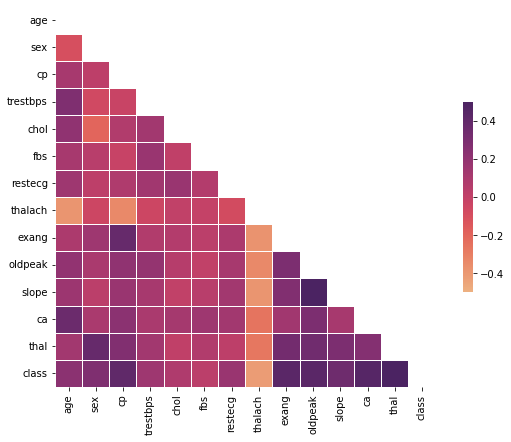

In [5]:
matrix = df.corr().round(2)

f, ax = plt.subplots(figsize=(10, 7))
mask = np.triu(np.ones_like(matrix, dtype=bool))


# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(matrix, mask=mask, cmap='flare', vmin=-.5, vmax=.5, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

The matrix indicates that the symptoms with the highest correlation to heart disease are chest pain, ST depression,  number of major blood vessels, and thalassemia. 

## III. Implementing Machine Learning Models

### Data Preprocessing

In [6]:
from sklearn.model_selection import train_test_split
from collections import Counter
from sklearn.preprocessing import StandardScaler

In [7]:
x = df.drop('class',axis=1)
y = df["class"]

In [8]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state = 0)

In [9]:
print(y_test.unique())
Counter(y_train)

[0 1]


Counter({0: 130, 1: 111})

In [10]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

### Implementing Models

In [11]:
from sklearn.metrics import confusion_matrix,accuracy_score,roc_curve,classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

#### Logistic Regression

In [12]:
lr = LogisticRegression()
lr_model = lr.fit(x_train, y_train)
lr_predict = lr.predict(x_test)

lr_confMatrix = confusion_matrix(y_test, lr_predict)
lr_accScore = accuracy_score(y_test, lr_predict)


lr_confMatrix, lr_accScore*100

(array([[28,  5],
        [ 2, 26]]),
 88.52459016393442)

#### Decision Tree Classifier

In [13]:
dt = DecisionTreeClassifier(criterion = 'entropy',random_state=0,max_depth = 6)
knn_model = dt.fit(x_train, y_train)
dt_predict = dt.predict(x_test)

dt_confMatrix = confusion_matrix(y_test, dt_predict)
dt_accScore = accuracy_score(y_test, dt_predict)

dt_confMatrix, dt_accScore*100

(array([[25,  8],
        [ 6, 22]]),
 77.04918032786885)

#### K-Nearest Neighbors 

In [14]:
knn = KNeighborsClassifier(n_neighbors=10)
knn_model = knn.fit(x_train, y_train)
knn_predict = knn.predict(x_test)

knn_confMatrix = confusion_matrix(y_test, knn_predict)
knn_accScore = accuracy_score(y_test, knn_predict)


knn_confMatrix, knn_accScore*100

(array([[28,  5],
        [ 6, 22]]),
 81.9672131147541)

### Model Evaluation

In [15]:
evaluation = pd.DataFrame({'Model': ['Logistic Regression','K-Nearest Neighbour','Decision Tree'],
                         'Accuracy': [lr_accScore*100, dt_accScore*100, knn_accScore*100]})
evaluation

,Model,Accuracy
0,Logistic Regression,88.524590
1,K-Nearest Neighbour,77.049180
2,Decision Tree,81.967213


The Logistic Regression model had the highest accuracy followed by the Decision Tree Classifier and the K-Nearest Neighbour algorithm respectively. 

In [16]:
### Feature Importance in Logistic Regression

In [17]:
coefficients = lr_model.coef_
importance = pd.DataFrame({'Feature': ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal'], 'Importance': coefficients[0]})

AttributeError: 'Rectangle' object has no property 'cmap'

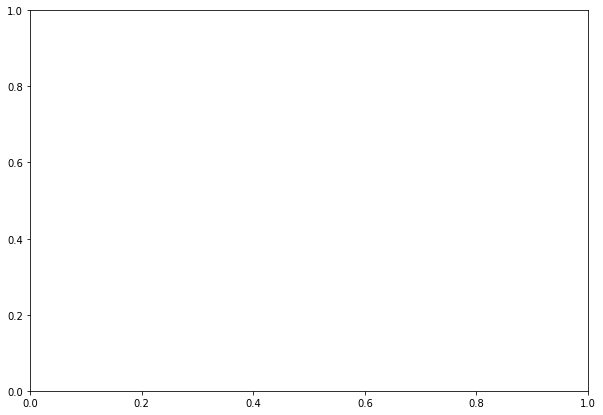

In [40]:
f, ax = plt.subplots(figsize=(10, 7))
sns.barplot(data=importance, x='Importance', y='Feature',)

The most important features in the logistic regression model were the number of major blood vessels, chest pain, and thalassemia. 